## Introduction

I am pleased to introduce to you my **first** data processing using basic machine learning methods.

Our task is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Data gathering

In [340]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data clean

Displaying columns that have any *null-values* and their count.

In [47]:
df.isna().agg(sum).apply(lambda x: x if x > 0 else None).dropna()

Age         177.0
Cabin       687.0
Embarked      2.0
dtype: float64

We can see that three columns have non-value values and one of them exactly **"Cabin"** has a significant number of them, therefore I decide to delete it.

In [341]:
df = df.drop(['Cabin'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

As we can see, the **"Cabin"** column has disappeared.

Let's also remove two rows from the **"Embraked"** column

In [342]:
df = df.dropna(subset=['Embarked'])
df['Embarked'].isnull().agg(sum)

0

Let's get more information from our columns.
Look for **unique items** for each column.

In [139]:
df.apply(lambda x: (len(x.unique()),x.unique())).T.rename(columns={0:"unique", 1:"elements"})

,unique,elements
PassengerId,889,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,2,"[0, 1]"
Pclass,3,"[3, 1, 2]"
Name,889,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
Sex,2,"[male, female]"
Age,89,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
SibSp,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,7,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,680,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Fare,247,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


Now, I can collect some information such as:
The **"Pclass"** column has the values 1, 2, 3
**"Embarked"** column similar to "S", "C", "Q"
I will drop the **"Name"** and **"Ticket"** columns because they contain a lot of information that I won't use.

In [343]:
df = df.drop(['Ticket', 'Name'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

## Exploring

In [143]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we can see from the **"Age"** column, the oldest person is *80* years old, the youngest is less than a year.
Max number of siblings / spouses is *8*.
Max number of parents / children is *6*.
The highest fare is *512* and the lowest is *0*.

Let us now turn our attention to the degree of survivor due to the Sex division.

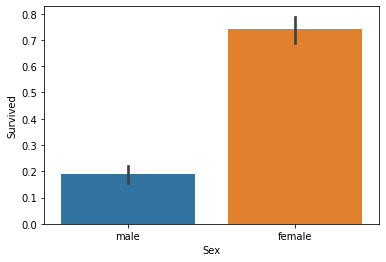

In [158]:
import seaborn as sns

_ = sns.barplot(x='Sex', y='Survived', data=df)

Women had a much better chance of survival(*74%*) than men(*18%*).

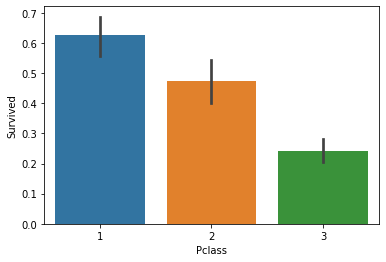

In [274]:
_ = sns.barplot(x='Pclass', y='Survived', data=df)

Passengers from **first** class are *more than twice* as likely to survive than passengers from **third** class

## Correlation

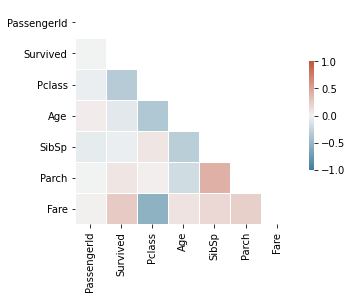

In [300]:
import numpy as np

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Strongly correlated columns add *no value* and can spoil our interpretations.

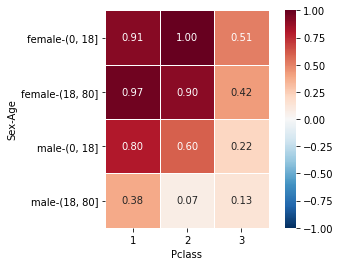

In [453]:
sex_age = pd.pivot_table(df, 'Survived', ['Sex', sets], 'Pclass')
_ = sns.heatmap(sex_age, cmap="RdBu_r", vmax=1, vmin=-1, annot=True,
                              square=True, linewidths=.5, fmt='.2f')

From the correlation above, we can conclude that **women** from the *first* and *second* categories had a chance of surviving almost **90%**
With **men**, the group under the age of *18* with the first category retained the **best chance** of survival.
On the other hand, the group of 
**adult men** did the worst, as did many in the *third category*.

I convert embarked string values to numbers for use in a chart.

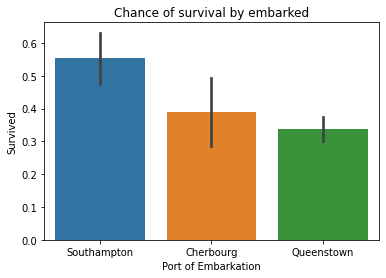

In [488]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
data_transformed = le.fit_transform(df['Embarked'])
g = sns.barplot(x=data_transformed, y=df['Survived'])
g.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
g.set_title('Chance of survival by embarked')
_ = g.set_xlabel('Port of Embarkation')

Statistically, above **50%** of the people who embarked from **Southampton** survived.